<a href="https://colab.research.google.com/github/cibelerusso/AnaliseMultivariadaEAprendizadoNaoSupervisionado/blob/master/Comandos%20em%20Python/Motiva%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Multivariada e Aprendizado Não-Supervisionado

por Cibele Russo.

ICMC USP São Carlos.

## Análise de Componentes Principais - Introdução

O conjunto de dados "educacao.csv" (Fonte: Ipeadata) mostra etatísticas educacionais por estado de acordo com a descrição a seguir.


- Sigla (do estado)
- Estado
- X1: Frequência escolar de pessoas com 7 a 14 anos
- X2: Defasagem escolar em mais de 1 ano de atraso de pessoas com 7 a 14 anos (2000)
- X3: Média de anos de estudo de pessoas com 25 anos ou mais (2000)
- X4: Taxa de analfabetos com 25 anos ou mais (2000)
- X5: Taxa de evasão escolar de pessoas com 7 a 14 anos (2000)
- X6: Taxa de evasão escolar de pessoas com 15 a 17 anos (2000)
- X7: Frequência escolar de pessoas com 7 a 22 anos


1. Deseja-se criar uma ordenação pela primeira componente principal da matriz de variâncias e covariâncias.
2. Quanto da variabilidade total dos dados é explicado pela primeira componente principai?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/cibelerusso/AnaliseMultivariadaEAprendizadoNaoSupervisionado/master/Dados/Educacao.csv", decimal='.', index_col=0)
df.columns = ['Estado','Freq:7-14','Defasagem_escolar','Anos.estudo:25+', 'Analfabetos:25+', 'Evasão:7-14', 'Evasao:15-17', 'Freq:7-22']

df.head()

,Estado,Freq:7-14,Defasagem_escolar,Anos.estudo:25+,Analfabetos:25+,Evasão:7-14,Evasao:15-17,Freq:7-22
Sigla,,,,,,,,
AC,Acre,83.9,37.1,4.6,29.7,16.08,30.47,76.02
AL,Alagoas,89.0,47.0,4.1,38.2,10.97,27.22,77.80
AM,Amazonas,83.2,41.0,5.5,19.1,16.80,27.26,74.95
AP,Amapá,93.4,28.7,6.1,16.0,6.60,17.06,88.41
BA,Bahia,93.1,41.8,4.5,28.5,6.87,20.68,81.68


In [2]:
# Cálculo da matriz de correlações
df1 = df.drop(columns=['Estado'], axis=1)
df1

corr = df1.corr()
corr

,Freq:7-14,Defasagem_escolar,Anos.estudo:25+,Analfabetos:25+,Evasão:7-14,Evasao:15-17,Freq:7-22
Freq:7-14,1.000000,-0.638089,0.505244,-0.477801,-0.999974,-0.559907,0.715964
Defasagem_escolar,-0.638089,1.000000,-0.816082,0.893044,0.639922,0.238947,-0.497443
Anos.estudo:25+,0.505244,-0.816082,1.000000,-0.900505,-0.506954,-0.497323,0.588444
Analfabetos:25+,-0.477801,0.893044,-0.900505,1.000000,0.479733,0.234025,-0.417379
Evasão:7-14,-0.999974,0.639922,-0.506954,0.479733,1.000000,0.560796,-0.717102
Evasao:15-17,-0.559907,0.238947,-0.497323,0.234025,0.560796,1.000000,-0.810542
Freq:7-22,0.715964,-0.497443,0.588444,-0.417379,-0.717102,-0.810542,1.000000


<Axes: >

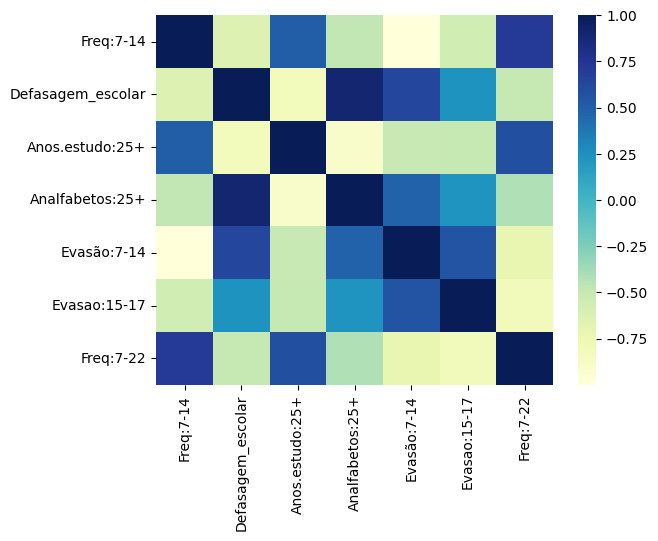

In [3]:
# Mapa de calor das correlações

sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

In [4]:
X = np.matrix(df.iloc[:,1:7])
S = np.cov(np.transpose(X))

In [5]:
X

matrix([[83.9 , 37.1 ,  4.6 , 29.7 , 16.08, 30.47],
        [89.  , 47.  ,  4.1 , 38.2 , 10.97, 27.22],
        [83.2 , 41.  ,  5.5 , 19.1 , 16.8 , 27.26],
        [93.4 , 28.7 ,  6.1 , 16.  ,  6.6 , 17.06],
        [93.1 , 41.8 ,  4.5 , 28.5 ,  6.87, 20.68],
        [94.4 , 32.8 ,  4.4 , 31.4 ,  5.63, 20.89],
        [97.6 , 13.6 ,  8.2 ,  7.2 ,  2.38, 13.29],
        [94.4 , 17.  ,  5.9 , 14.2 ,  5.57, 26.06],
        [96.  , 23.3 ,  5.7 , 15.  ,  3.98, 21.54],
        [91.6 , 44.5 ,  4.  , 35.  ,  8.4 , 23.99],
        [95.9 , 17.9 ,  5.6 , 14.8 ,  4.11, 23.96],
        [95.2 , 20.6 ,  5.7 , 14.  ,  4.79, 27.41],
        [93.6 , 22.1 ,  5.5 , 15.5 ,  6.4 , 27.64],
        [90.1 , 44.5 ,  5.  , 20.6 ,  9.92, 26.44],
        [93.9 , 42.5 ,  4.3 , 34.8 ,  6.13, 25.02],
        [92.1 , 36.8 ,  5.1 , 28.3 ,  7.95, 25.63],
        [93.7 , 47.6 ,  3.9 , 36.7 ,  6.31, 23.55],
        [95.6 , 13.7 ,  6.  , 11.7 ,  4.36, 26.94],
        [96.1 , 22.4 ,  7.2 ,  7.6 ,  3.89, 18.54],
        [94.

In [6]:
S

array([[ 12.52293447, -27.46799145,   1.83242165, -16.98814815,
        -12.52570798,  -9.11138604],
       [-27.46799145, 147.97410256, -10.1741453 , 109.14696581,
         27.55374786,  13.36623932],
       [  1.83242165, -10.1741453 ,   1.05037037,  -9.27263533,
         -1.83907977,  -2.34382194],
       [-16.98814815, 109.14696581,  -9.27263533, 100.94669516,
         17.06108832,  10.8124416 ],
       [-12.52570798,  27.55374786,  -1.83907977,  17.06108832,
         12.52914558,   9.12810484],
       [ -9.11138604,  13.36623932,  -2.34382194,  10.8124416 ,
          9.12810484,  21.14610114]])

In [7]:
# variâncias

np.diagonal(S)

array([ 12.52293447, 147.97410256,   1.05037037, 100.94669516,
        12.52914558,  21.14610114])

In [8]:
# Análise de Componentes Principais

# 1. Deseja-se criar uma ordenação pela primeira componente principal da matriz de variâncias e covariâncias.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)


In [9]:
pca.fit(df1)

PCA(n_components=2)

In [10]:
# Pesos das componentes principais

pca.components_


array([[-0.14598341,  0.75263618, -0.0568909 ,  0.60011032,  0.14643369,
         0.09242527, -0.13738052],
       [-0.35172815, -0.08297083, -0.01539213, -0.28205984,  0.35157817,
         0.64839843, -0.49556104]])

In [11]:
# 2. Quanto da variabilidade total dos dados é explicado pela primeira componente principai?

# Variância das componentes principais

pca.explained_variance_ratio_

array([0.80942649, 0.11537727])

In [12]:
pca.transform(df1)

array([[ 1.55452907e+01,  1.06921945e+01],
       [ 2.60880609e+01,  9.01199113e-01],
       [ 1.21261333e+01,  1.22928270e+01],
       [-4.80030221e+00, -6.27912155e+00],
       [ 1.39941186e+01, -4.98438742e+00],
       [ 8.18445406e+00, -7.36223020e+00],
       [-2.36355224e+01, -9.75099198e+00],
       [-1.29502333e+01,  4.61571406e+00],
       [-9.13573438e+00, -2.10983928e+00],
       [ 2.11838031e+01, -2.09288793e+00],
       [-1.24099366e+01,  2.38024903e+00],
       [-1.07001551e+01,  3.81413522e+00],
       [-8.33392431e+00,  3.95293193e+00],
       [ 1.31917864e+01,  4.74270600e+00],
       [ 1.86662360e+01, -3.90459303e+00],
       [ 1.11379075e+01,  4.98971284e-01],
       [ 2.36340454e+01, -5.50852635e+00],
       [-1.76409292e+01,  3.76512940e+00],
       [-1.46635461e+01, -2.05239956e+00],
       [ 7.15153647e+00, -6.72667944e+00],
       [-2.07533111e+00,  1.43649465e+01],
       [-8.56349278e+00, -3.89409755e+00],
       [-2.12105958e+01,  2.17518603e-02],
       [-2.

In [13]:
PCA1 = pca.transform(df1)[:,0]
PCA2 = pca.transform(df1)[:,1]

In [14]:
df['PCA1'] = PCA1
df['PCA2'] = PCA2


In [15]:
df.head()

,Estado,Freq:7-14,Defasagem_escolar,Anos.estudo:25+,Analfabetos:25+,Evasão:7-14,Evasao:15-17,Freq:7-22,PCA1,PCA2
Sigla,,,,,,,,,,
AC,Acre,83.9,37.1,4.6,29.7,16.08,30.47,76.02,15.545291,10.692194
AL,Alagoas,89.0,47.0,4.1,38.2,10.97,27.22,77.80,26.088061,0.901199
AM,Amazonas,83.2,41.0,5.5,19.1,16.80,27.26,74.95,12.126133,12.292827
AP,Amapá,93.4,28.7,6.1,16.0,6.60,17.06,88.41,-4.800302,-6.279122
BA,Bahia,93.1,41.8,4.5,28.5,6.87,20.68,81.68,13.994119,-4.984387


In [16]:
df['PCA1'].head()

Sigla
AC    15.545291
AL    26.088061
AM    12.126133
AP    -4.800302
BA    13.994119
Name: PCA1, dtype: float64

In [17]:
np.sort(df['PCA1'])

array([-24.12726899, -23.63552238, -21.40705189, -21.21059577,
       -17.64092917, -14.66354608, -12.95023325, -12.40993658,
       -10.70015512,  -9.13573438,  -8.56349278,  -8.33392431,
        -4.80030221,  -2.07533111,   5.51092333,   7.15153647,
         8.18445406,  11.13790751,  12.12613328,  13.19178642,
        13.99411858,  15.23972838,  15.54529066,  18.66623595,
        21.18380308,  23.63404539,  26.08806092])

Como propor uma ordenação dos dados usando a primeira componente principal?

In [18]:
df.sort_values(by='PCA1', ascending=False)

,Estado,Freq:7-14,Defasagem_escolar,Anos.estudo:25+,Analfabetos:25+,Evasão:7-14,Evasao:15-17,Freq:7-22,PCA1,PCA2
Sigla,,,,,,,,,,
AL,Alagoas,89.0,47.0,4.1,38.2,10.97,27.22,77.80,26.088061,0.901199
PI,Piauí,93.7,47.6,3.9,36.7,6.31,23.55,80.05,23.634045,-5.508526
MA,Maranhão,91.6,44.5,4.0,35.0,8.40,23.99,78.19,21.183803,-2.092888
PB,Paraíba,93.9,42.5,4.3,34.8,6.13,25.02,80.39,18.666236,-3.904593
AC,Acre,83.9,37.1,4.6,29.7,16.08,30.47,76.02,15.545291,10.692194
SE,Sergipe,93.3,42.2,4.7,29.6,6.74,24.12,81.49,15.239728,-3.122324
BA,Bahia,93.1,41.8,4.5,28.5,6.87,20.68,81.68,13.994119,-4.984387
PA,Pará,90.1,44.5,5.0,20.6,9.92,26.44,77.91,13.191786,4.742706
AM,Amazonas,83.2,41.0,5.5,19.1,16.80,27.26,74.95,12.126133,12.292827
